<a href="https://colab.research.google.com/github/send0moka/uas-pcd/blob/main/H1D022006_Jehian_Athaya_Tsani_Az_Zuhry_UAS_PCD_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import libraries untuk computer vision dan data analysis

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load gambar dari GitHub repository dan konversi ke grayscale

In [2]:
import urllib.request

# Download image dari GitHub
base_url = 'https://raw.githubusercontent.com/send0moka/uas-pcd/main/'
image_file = 'image.png'

urllib.request.urlretrieve(base_url + image_file, image_file)
print(f'Downloaded: {image_file}')

# Load gambar asli
gambarAsli = cv2.imread('image.png')

# Convert BGR ke RGB untuk matplotlib
gambarAsli = cv2.cvtColor(gambarAsli, cv2.COLOR_BGR2RGB)

# Convert ke grayscale
gambarGray = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

Downloaded: image.png


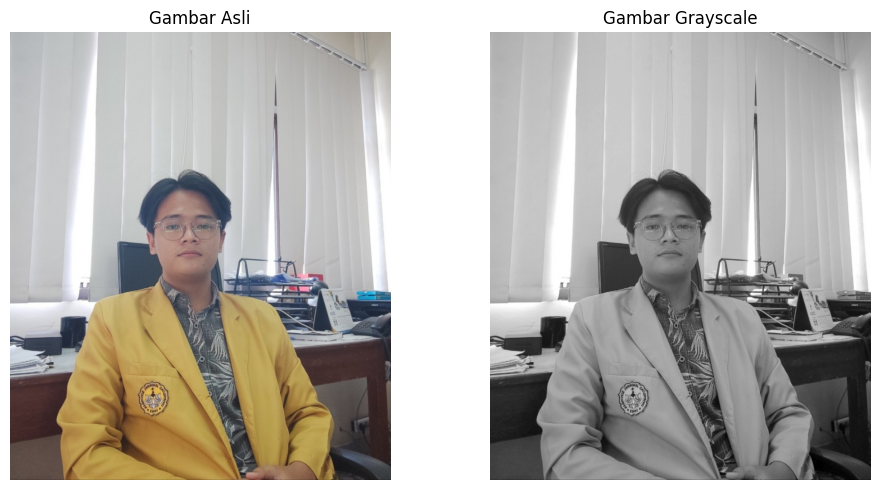

In [3]:
# Tampilkan gambar asli dan grayscale
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gambarAsli)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

axes[1].imshow(gambarGray, cmap='gray')
axes[1].set_title('Gambar Grayscale')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 3. Terapkan konvolusi dengan kernel Sobel untuk mendeteksi tepi horizontal dan vertikal

In [4]:
# Terapkan Sobel di arah x (deteksi tepi vertikal)
sobel_x = cv2.Sobel(gambarGray, cv2.CV_64F, 1, 0, ksize=3)

# Terapkan Sobel di arah y (deteksi tepi horizontal)
sobel_y = cv2.Sobel(gambarGray, cv2.CV_64F, 0, 1, ksize=3)

# Kombinasikan hasil Sobel x dan y
sobel_akhir = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi hasil agar sesuai dengan rentang 0-255
sobel_akhir = cv2.normalize(sobel_akhir, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

### 4. Terapkan deteksi tepi menggunakan metode Canny

In [5]:
# Terapkan deteksi tepi Canny
canny = cv2.Canny(gambarGray, 100, 200)

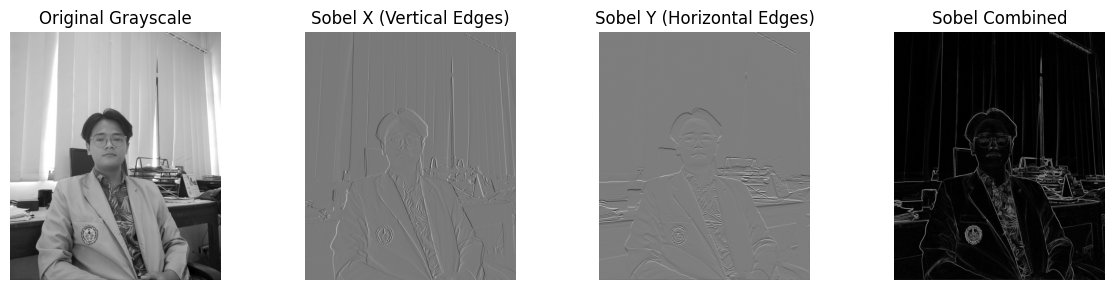

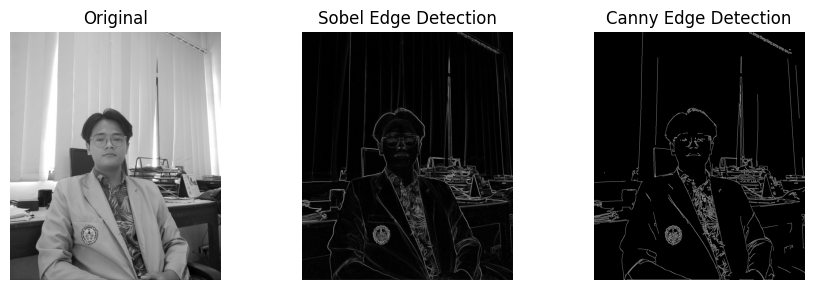

In [13]:
# Tampilkan hasil deteksi tepi
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].imshow(gambarGray, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title('Sobel X (Vertical Edges)')
axes[1].axis('off')

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title('Sobel Y (Horizontal Edges)')
axes[2].axis('off')

axes[3].imshow(sobel_akhir, cmap='gray')
axes[3].set_title('Sobel Combined')
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Tampilkan perbandingan Sobel dan Canny
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].imshow(gambarGray, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(sobel_akhir, cmap='gray')
axes[1].set_title('Sobel Edge Detection')
axes[1].axis('off')

axes[2].imshow(canny, cmap='gray')
axes[2].set_title('Canny Edge Detection')
axes[2].axis('off')

plt.tight_layout()
plt.show()